In [1]:
!pip install roboflow --quiet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.2/72.2 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.

In [4]:
import os
import cv2
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Input, Conv2D, ReLU, LeakyReLU, BatchNormalization, MaxPooling2D, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16

from roboflow import Roboflow


In [10]:
!mkdir /content/datasets
!cd /content/datasets

rf = Roboflow(api_key="8O0d3piVDubPgWzft4ha")
project = rf.workspace("bdbi").project("image-annotation-lxsso")
dataset = project.version(5).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
[WARNING] we noticed you are downloading a `yolov8` datasets but you don't have `ultralytics` installed. Roboflow `.deploy` supports only models trained with `ultralytics==8.0.134`, to intall it `pip install ultralytics==8.0.134`.



Extracting Dataset Version Zip to Image-Annotation-5 in yolov8:: 100%|██████████| 5212/5212 [00:00<00:00, 6044.09it/s]


In [11]:
path_to_train_images = '/content/Image-Annotation-5/train/images'
# path_to_train_labels = '/content/Image-Annotation-5/train/labels'
path_to_test_images = '/content/Image-Annotation-5/test/images'
# path_to_test_labels = '/content/Image-Annotation-5/test/labels'
path_to_val_images = '/content/Image-Annotation-5/valid/images'
# path_to_val_labels = '/content/Image-Annotation-5/valid/labels'


In [20]:
train_features = list()
test_features = list()
val_features = list()

# image size: (512, 513)

def data_preprocessing(folder, features):
    files = os.listdir(folder) #files now  contains all the images found in'folder'
    files.sort()

    for file in files:
      img = cv2.imread(folder+'/'+file)
      name = file.split('.')[0]
      if img is not None: # if the file is not empty
          img = np.array(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))
          blur = cv2.GaussianBlur(img,(5,5), 0)

          edge = cv2.Canny(blur, 50, 150, 3)
          features.append({"name": name, "img": np.array(edge).astype(np.float32)/255}) # normalization


In [21]:
data_preprocessing(path_to_train_images, train_features)


a_004_jpg


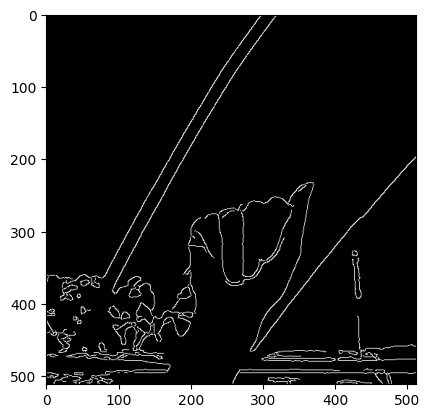

In [22]:
print(train_features[1]["name"])
plt.imshow(train_features[1]["img"], cmap='gray')